In [58]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime, timedelta


print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_columns', None)

from google.colab import drive
drive.mount('/content/drive')

numpy version :  1.19.5
pandas version :  1.1.5
seaborn version :  0.11.2
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

[(0.0, 0.10980392156862745, 0.4980392156862745),
 (0.6941176470588235, 0.25098039215686274, 0.050980392156862744),
 (0.07058823529411765, 0.44313725490196076, 0.10980392156862745),
 (0.5490196078431373, 0.03137254901960784, 0.0),
 (0.34901960784313724, 0.11764705882352941, 0.44313725490196076),
 (0.34901960784313724, 0.1843137254901961, 0.050980392156862744),
 (0.6352941176470588, 0.20784313725490197, 0.5098039215686274),
 (0.23529411764705882, 0.23529411764705882, 0.23529411764705882),
 (0.7215686274509804, 0.5215686274509804, 0.0392156862745098),
 (0.0, 0.38823529411764707, 0.4549019607843137)]

In [61]:
df=pd.read_csv('/content/drive/MyDrive/MAZDA/dataset/bank-marketing.csv')

# developer-friendly column names and format
df.columns = [x.lower().replace('-', '_').replace(' ', '_') for x in df.columns.to_list()]

df.sample(5, random_state=42)

,age,age_group,eligible,job,salary,marital,education,marital_education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,response
3776,40,4,Y,blue-collar,20000,married,secondary,married-secondary,yes,no,580,yes,no,unknown,16,may,192,1,-1,0,unknown,no,0
9928,47,4,Y,services,70000,single,secondary,single-secondary,yes,no,3644,no,no,unknown,9,jun,83,2,-1,0,unknown,no,0
33409,25,2,Y,student,4000,single,tertiary,single-tertiary,no,no,538,yes,no,cellular,20,apr,226,1,-1,0,unknown,no,0
31885,42,4,Y,management,100000,married,tertiary,married-tertiary,yes,no,1773,no,no,cellular,9,apr,311,1,336,1,failure,no,0
15738,56,5,Y,management,100000,married,tertiary,married-tertiary,yes,no,217,no,yes,cellular,21,jul,121,2,-1,0,unknown,no,0


EDA

In [62]:
# Check For Missing Value (Null, NaN, or None)
df.isna().sum()

age                  0
age_group            0
eligible             0
job                  0
salary               0
marital              0
education            0
marital_education    0
targeted             0
default              0
balance              0
housing              0
loan                 0
contact              0
day                  0
month                0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
y                    0
response             0
dtype: int64

In [63]:
# Check For Invalid Data By Column's Unique Value
for x in df.columns.to_list():
    print(x + ' :')
    print(df[x].sort_values().unique())
    print('')

age :
[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65
 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89
 90 92 93 94 95]

age_group :
[1 2 3 4 5 6 7 8 9]

eligible :
['N' 'Y']

job :
['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']

salary :
[     0   4000   8000  16000  20000  50000  55000  60000  70000 100000
 120000]

marital :
['divorced' 'married' 'single']

education :
['primary' 'secondary' 'tertiary' 'unknown']

marital_education :
['divorced-primary' 'divorced-secondary' 'divorced-tertiary'
 'divorced-unknown' 'married-primary' 'married-secondary'
 'married-tertiary' 'married-unknown' 'single-primary' 'single-secondary'
 'single-tertiary' 'single-unknown']

targeted :
['no' 'yes']

default :
['no' 'yes']

balance :
[ -8019  -6847  -4057 ...  81204  98417 10212

## Check Duplicated Data

In [64]:
non_target_columns = df.columns.to_list()
non_target_columns.remove('y')
non_target_columns.remove('response')

df.duplicated(non_target_columns).sum()

0

# DROP Column Y

In [65]:
if 'y' in df.columns.to_list():
  df = df.drop(['y'], axis = 1)

df.sample(5)

,age,age_group,eligible,job,salary,marital,education,marital_education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
23060,35,3,Y,management,100000,married,tertiary,married-tertiary,yes,no,0,no,no,cellular,26,aug,436,2,-1,0,unknown,0
44358,31,3,Y,services,70000,single,tertiary,single-tertiary,no,no,1626,no,no,unknown,31,jul,15,1,-1,0,unknown,0
39758,48,4,Y,management,100000,married,tertiary,married-tertiary,yes,no,1167,yes,yes,cellular,1,jun,264,1,-1,0,unknown,1
11812,56,5,Y,unknown,0,married,unknown,married-unknown,no,no,0,no,no,unknown,20,jun,471,2,-1,0,unknown,0
37057,37,3,Y,blue-collar,20000,divorced,secondary,divorced-secondary,yes,no,719,yes,no,cellular,13,may,118,1,365,1,failure,0


## Change pdays -1 to 0

In [66]:
df.pdays = df.pdays.apply(lambda x: 0 if (x == -1) else x)
df.sample(5, random_state=42)

,age,age_group,eligible,job,salary,marital,education,marital_education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
3776,40,4,Y,blue-collar,20000,married,secondary,married-secondary,yes,no,580,yes,no,unknown,16,may,192,1,0,0,unknown,0
9928,47,4,Y,services,70000,single,secondary,single-secondary,yes,no,3644,no,no,unknown,9,jun,83,2,0,0,unknown,0
33409,25,2,Y,student,4000,single,tertiary,single-tertiary,no,no,538,yes,no,cellular,20,apr,226,1,0,0,unknown,0
31885,42,4,Y,management,100000,married,tertiary,married-tertiary,yes,no,1773,no,no,cellular,9,apr,311,1,336,1,failure,0
15738,56,5,Y,management,100000,married,tertiary,married-tertiary,yes,no,217,no,yes,cellular,21,jul,121,2,0,0,unknown,0


In [67]:
cats= list(df.select_dtypes(include=['object','datetime64[ns]','bool']) )
nums= list(df.select_dtypes(include='int64') )
print(nums)
print(cats)

['age', 'age_group', 'salary', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'response']
['eligible', 'job', 'marital', 'education', 'marital_education', 'targeted', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


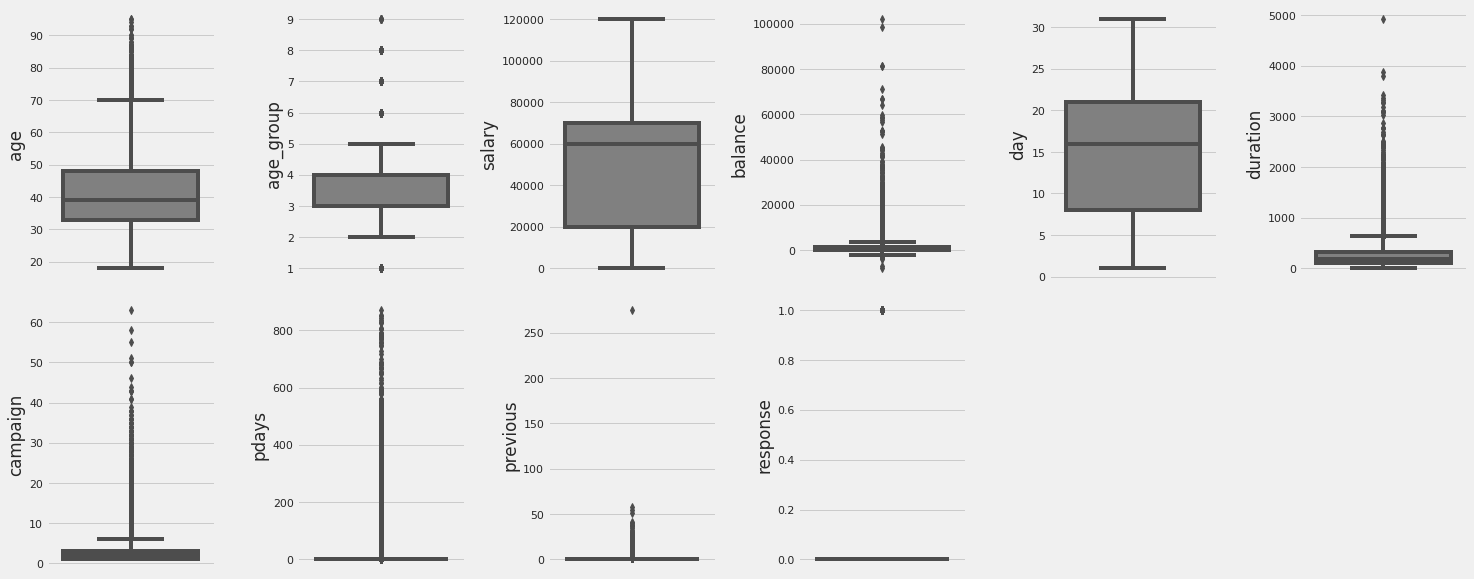

In [68]:
for i in range(0, len(nums)):
    plt.subplot(2, (len(nums)/2)+1, i+1)
    sns.boxplot(y=df[nums[i]], color='gray', orient='v')
    plt.tight_layout()

Terdeteksi outlier pada balance.duration,campaign yg perlu di take out

Feature Engineering

In [69]:

from scipy import stats
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))

for col in ['balance', 'duration', 'campaign']:
    zscore = abs(stats.zscore(df[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
df = df[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 45211
Jumlah baris setelah memfilter outlier: 42707


In [70]:
df_new=df.copy()

<Figure size 1080x576 with 0 Axes>

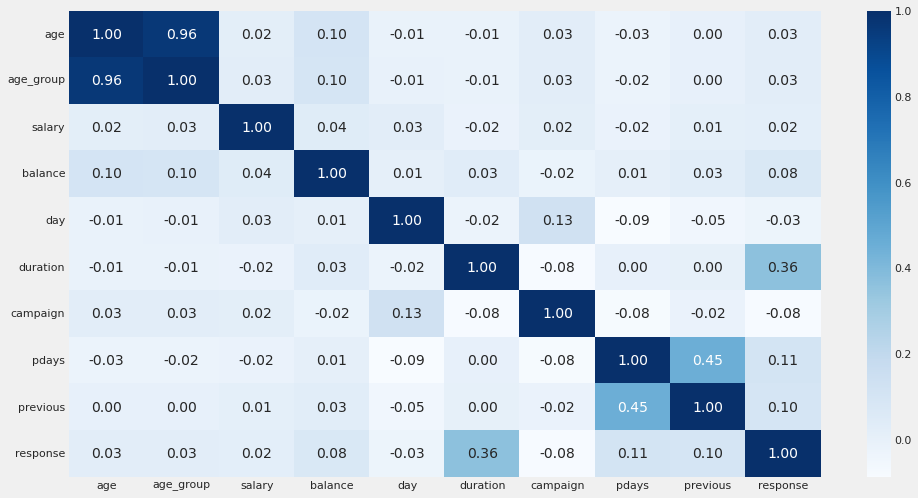

In [71]:
plt.figure(figsize=(15, 8))
sns.heatmap(df_new.corr(), cmap='Blues', annot=True, fmt='.2f')

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

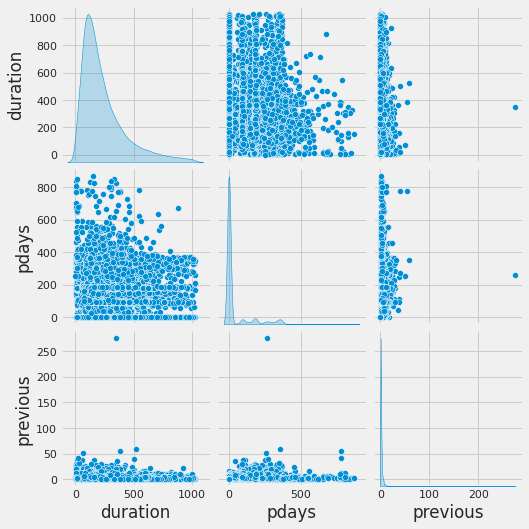

In [72]:
features= ['duration','pdays','previous']
plt.figure(figsize=(15, 15))
sns.pairplot(df_new[features], diag_kind='kde')

insight

<Figure size 1080x360 with 0 Axes>

Text(0, 0.5, 'count')

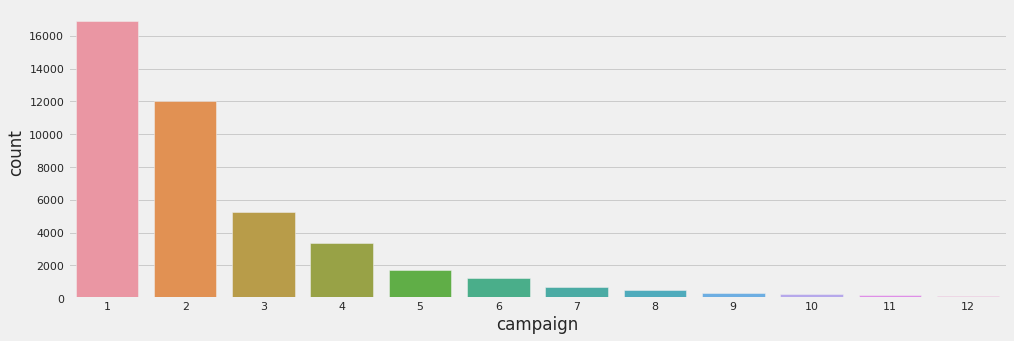

In [73]:
plt.figure(figsize=(15, 5))
ax = sns.barplot(x='campaign', y='age', data=df_new.groupby(['campaign']).agg('count').reset_index()[['campaign', 'age']])
ax.set_ylabel('count')

<Figure size 1440x1656 with 0 Axes>

<Figure size 1440x1656 with 0 Axes>

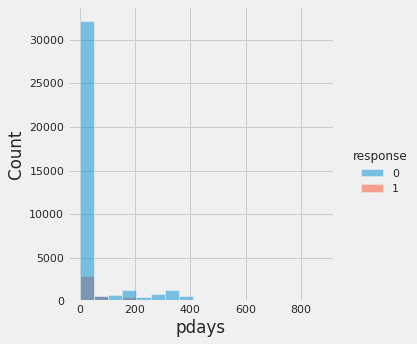

In [74]:
plt.figure(figsize=(20, 23))
sns.displot(x='pdays', hue='response', data=df_new)

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

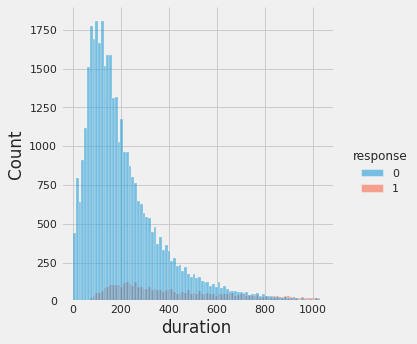

In [75]:
plt.figure(figsize=(15, 5))
sns.displot(x='duration', hue='response', data=df_new)

1.   customer akan mungkin berlayanan/ mengikuti campaign jika jarak dari    penawaran sebelumnya <=200 days
2.  semakin lama duration telp maka kemungkinan response=0 makin kecil, ini bisa jadi parameter untuk jarak menawarkan produk kita

<Figure size 1080x360 with 0 Axes>

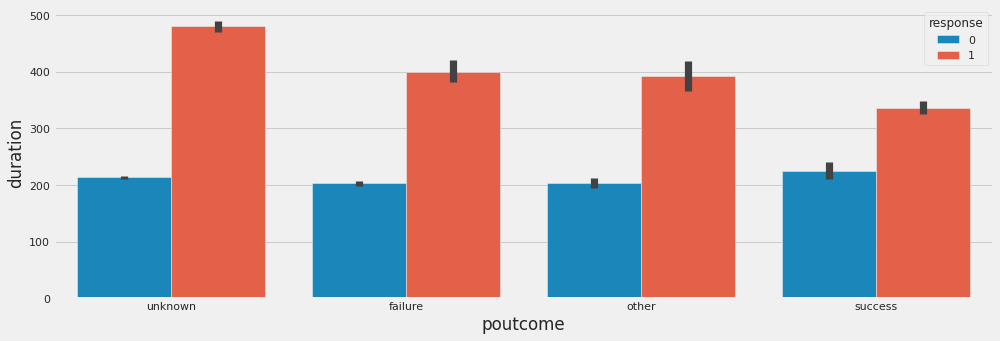

In [76]:
plt.figure(figsize=(15, 5))
sns.barplot(x='poutcome', y='duration' ,hue='response', data=df_new)

lama duration ternyata memang berpengaruh untuk mengubah response lama jadi yes untuk saat ini

<Figure size 1080x360 with 0 Axes>

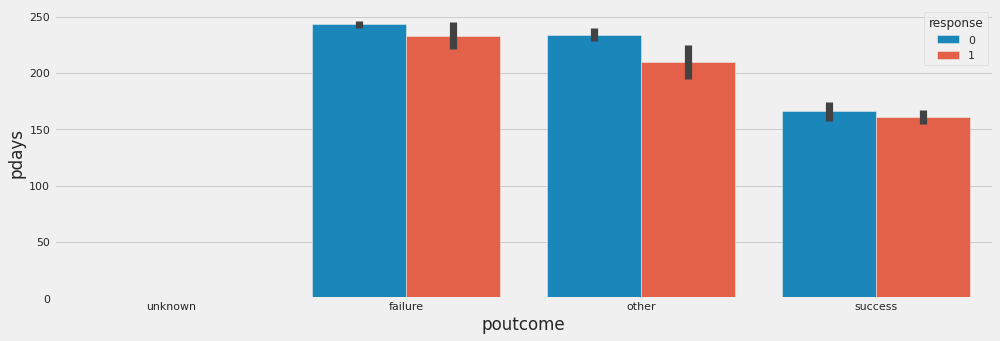

In [77]:
plt.figure(figsize=(15, 5))
sns.barplot(x='poutcome', y='pdays' ,hue='response', data=df_new)

<Figure size 1080x360 with 0 Axes>

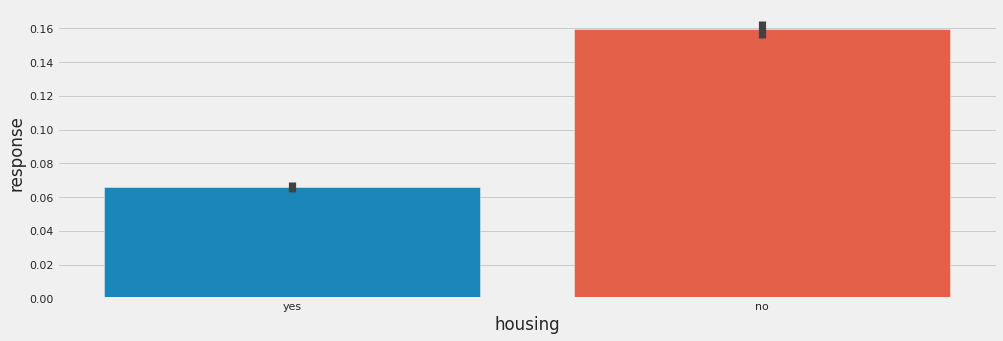

In [78]:
plt.figure(figsize=(15, 5))
sns.barplot(x='housing',y='response',data=df_new)

<Figure size 1080x360 with 0 Axes>

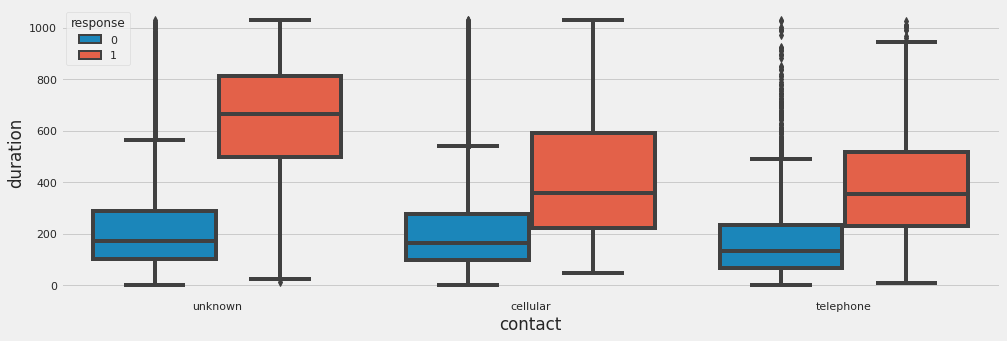

In [79]:
plt.figure(figsize=(15, 5))
sns.boxplot(x='contact',y='duration', hue='response',data=df_new)

<Figure size 1080x360 with 0 Axes>

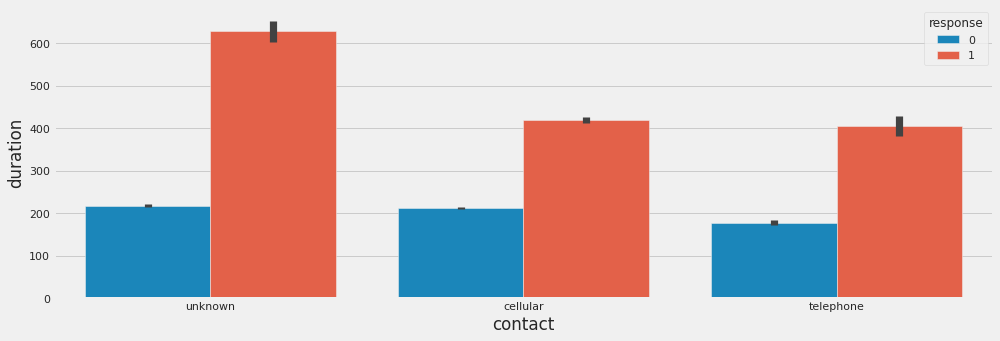

In [80]:
plt.figure(figsize=(15, 5))
sns.barplot(x='contact',y='duration', hue='response',data=df_new)

Modelling

<Figure size 864x1080 with 0 Axes>

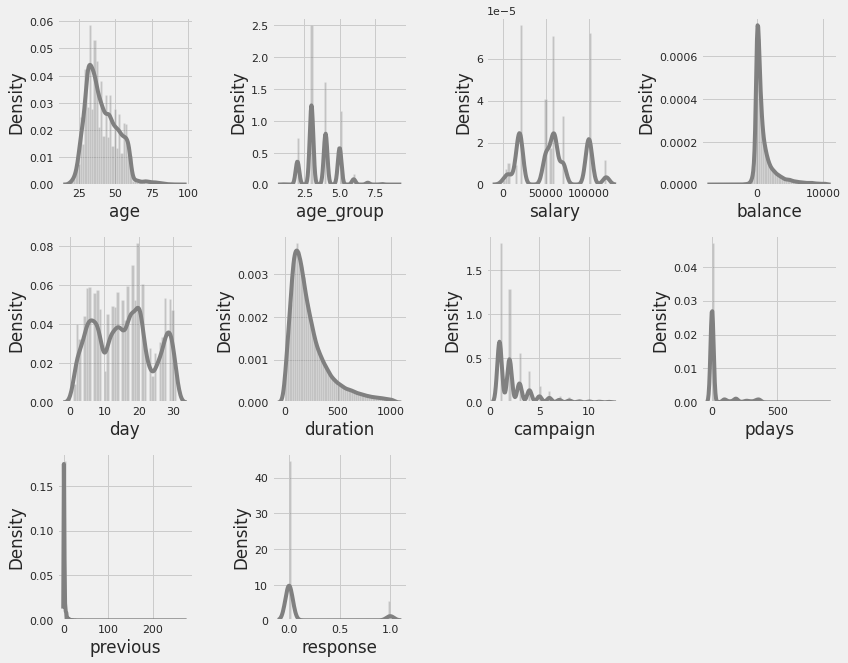

In [81]:
plt.figure(figsize=(12, 15))
for i in range(0, len(nums)):
    plt.subplot(5, (len(nums)/3)+1, i+1)
    sns.distplot(df_new[nums[i]], color='gray')
    plt.tight_layout()

In [82]:
### Label Encoding
if 'contacted_date' in df_new.columns.to_list():
    df_new.drop(['contacted_date'], axis=1, inplace=True)
if 'pcontacted_date' in df_new.columns.to_list():
    df_new.drop(['pcontacted_date'], axis=1, inplace=True)


for f in df_new.select_dtypes(include='object').columns.to_list():
    df_new[f] = df_new[f].astype('category').cat.codes

df_new


,age,age_group,eligible,job,salary,marital,education,marital_education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,5,1,4,100000,1,2,6,1,0,2143,1,0,2,5,8,261,1,0,0,3,0
1,44,4,1,9,60000,2,1,9,1,0,29,1,0,2,5,8,151,1,0,0,3,0
2,33,3,1,2,120000,1,1,5,1,0,2,1,1,2,5,8,76,1,0,0,3,0
3,47,4,1,1,20000,1,3,7,0,0,1506,1,0,2,5,8,92,1,0,0,3,0
4,33,3,1,11,0,2,3,11,0,0,1,0,0,2,5,8,198,1,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45205,25,2,1,9,60000,2,1,9,1,0,505,0,1,0,17,9,386,2,0,0,3,1
45206,51,5,1,9,60000,1,2,6,1,0,825,0,0,0,17,9,977,3,0,0,3,1
45207,71,7,0,5,55000,0,0,0,1,0,1729,0,0,0,17,9,456,2,0,0,3,1
45209,57,5,1,1,20000,1,1,5,1,0,668,0,0,1,17,9,508,4,0,0,3,0


<Figure size 1440x1440 with 0 Axes>

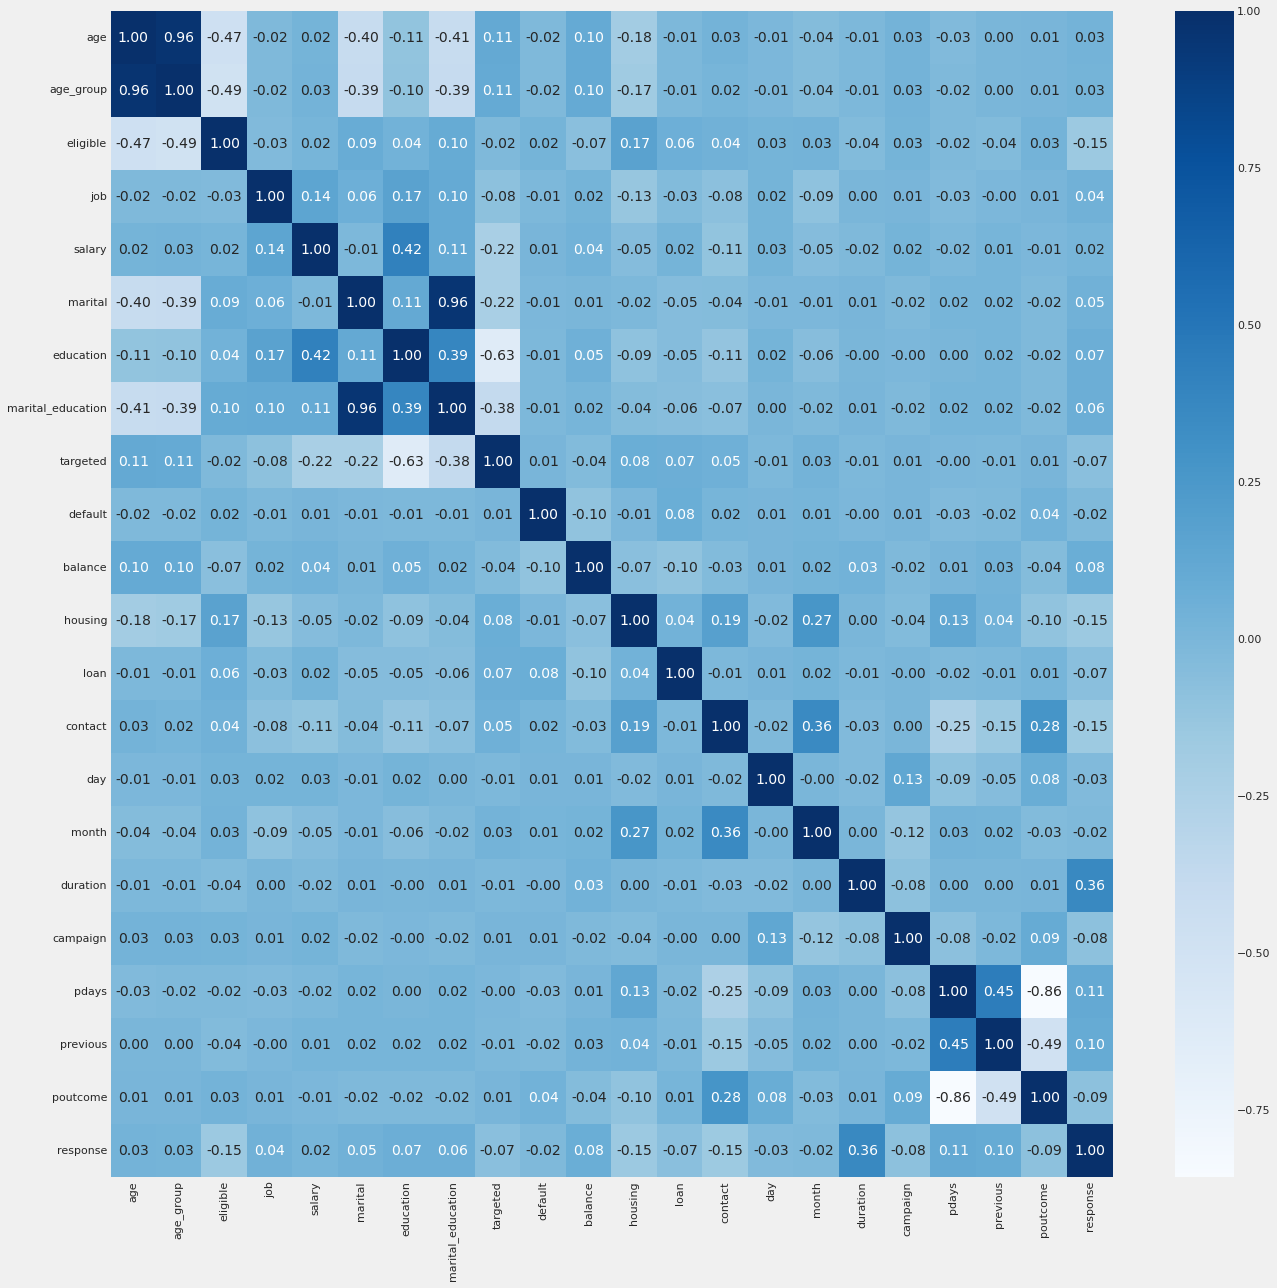

In [83]:
plt.figure(figsize=(20, 20))
sns.heatmap(df_new.corr(), cmap='Blues', annot=True, fmt='.2f')

In [84]:
df_new.describe()

,age,age_group,eligible,job,salary,marital,education,marital_education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
count,42707.000000,42707.000000,42707.000000,42707.000000,42707.000000,42707.000000,42707.000000,42707.000000,42707.000000,42707.000000,42707.000000,42707.000000,42707.000000,42707.000000,42707.000000,42707.000000,42707.000000,42707.000000,42707.000000,42707.000000,42707.000000,42707.000000
mean,40.900813,3.642401,0.959936,4.331093,56800.852319,1.166647,1.218255,5.884843,0.822441,0.018217,1084.115906,0.558339,0.161566,0.639778,15.683846,5.543728,235.974571,2.452970,41.975273,0.590863,2.550004,0.107289
std,10.613921,1.082950,0.196111,3.279015,32036.813245,0.608849,0.747130,2.625806,0.382145,0.133737,1721.089369,0.496591,0.368057,0.898418,8.289161,3.004271,190.564406,1.941219,100.872381,2.329465,0.998664,0.309484
min,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6847.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,3.000000,1.000000,1.000000,20000.000000,1.000000,1.000000,5.000000,1.000000,0.000000,68.000000,0.000000,0.000000,0.000000,8.000000,3.000000,104.000000,1.000000,0.000000,0.000000,3.000000,0.000000
50%,39.000000,3.000000,1.000000,4.000000,60000.000000,1.000000,1.000000,5.000000,1.000000,0.000000,431.000000,1.000000,0.000000,0.000000,16.000000,6.000000,178.000000,2.000000,0.000000,0.000000,3.000000,0.000000
75%,48.000000,4.000000,1.000000,7.000000,70000.000000,2.000000,2.000000,9.000000,1.000000,0.000000,1347.000000,1.000000,0.000000,2.000000,21.000000,8.000000,307.000000,3.000000,0.000000,0.000000,3.000000,0.000000
max,95.000000,9.000000,1.000000,11.000000,120000.000000,2.000000,3.000000,11.000000,1.000000,1.000000,10483.000000,1.000000,1.000000,2.000000,31.000000,11.000000,1030.000000,12.000000,871.000000,275.000000,3.000000,1.000000


In [85]:
df_new['response'].value_counts()

0    38125
1     4582
Name: response, dtype: int64

In [86]:
x = df_new.drop(['response'], axis=1)
y = df_new[['response']]

x.head()
y.head()

,age,age_group,eligible,job,salary,marital,education,marital_education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,5,1,4,100000,1,2,6,1,0,2143,1,0,2,5,8,261,1,0,0,3
1,44,4,1,9,60000,2,1,9,1,0,29,1,0,2,5,8,151,1,0,0,3
2,33,3,1,2,120000,1,1,5,1,0,2,1,1,2,5,8,76,1,0,0,3
3,47,4,1,1,20000,1,3,7,0,0,1506,1,0,2,5,8,92,1,0,0,3
4,33,3,1,11,0,2,3,11,0,0,1,0,0,2,5,8,198,1,0,0,3


,response
0,0
1,0
2,0
3,0
4,0


In [87]:
np.unique

<function numpy.unique>

In [88]:
from imblearn import under_sampling, over_sampling
x_over, y_over = over_sampling.SMOTE(0.5).fit_resample(x, y)

In [89]:
print('SMOTE')
print(pd.Series(y_over).value_counts())

SMOTE
0    38125
1    19062
dtype: int64


<Figure size 360x360 with 0 Axes>

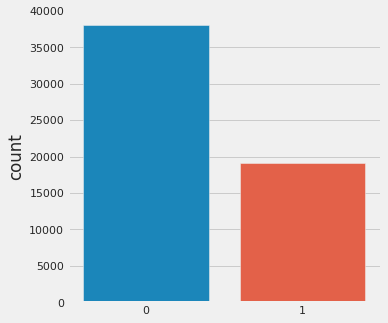

In [90]:
plt.figure(figsize=(5, 5))
sns.countplot(y_over)

In [91]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size = 0.3, random_state = 42)

In [92]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

def eval_classification(model, pred, xtrain, ytrain, xtest, ytest):
    print("\nAccuracy (Test Set): %.2f" % accuracy_score(ytest, pred))
    print("Precision (Test Set): %.2f" % precision_score(ytest, pred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, pred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, pred))
    
    fpr, tpr, thresholds = roc_curve(ytest, pred, pos_label=1) # pos_label: label yang kita anggap positive
    print("AUC: %.2f" % auc(fpr, tpr))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

# Decision Tree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')


Accuracy (Test Set): 0.88
Precision (Test Set): 0.81
Recall (Test Set): 0.83
F1-Score (Test Set): 0.82
AUC: 0.87
[0.04781795 0.03550921 0.01600065 0.02299143 0.01842672 0.00894326
 0.01725792 0.02184633 0.01101679 0.00094781 0.06192826 0.12465569
 0.0249188  0.04712868 0.05579848 0.05964384 0.2978094  0.02545486
 0.02511543 0.00615563 0.07063288]


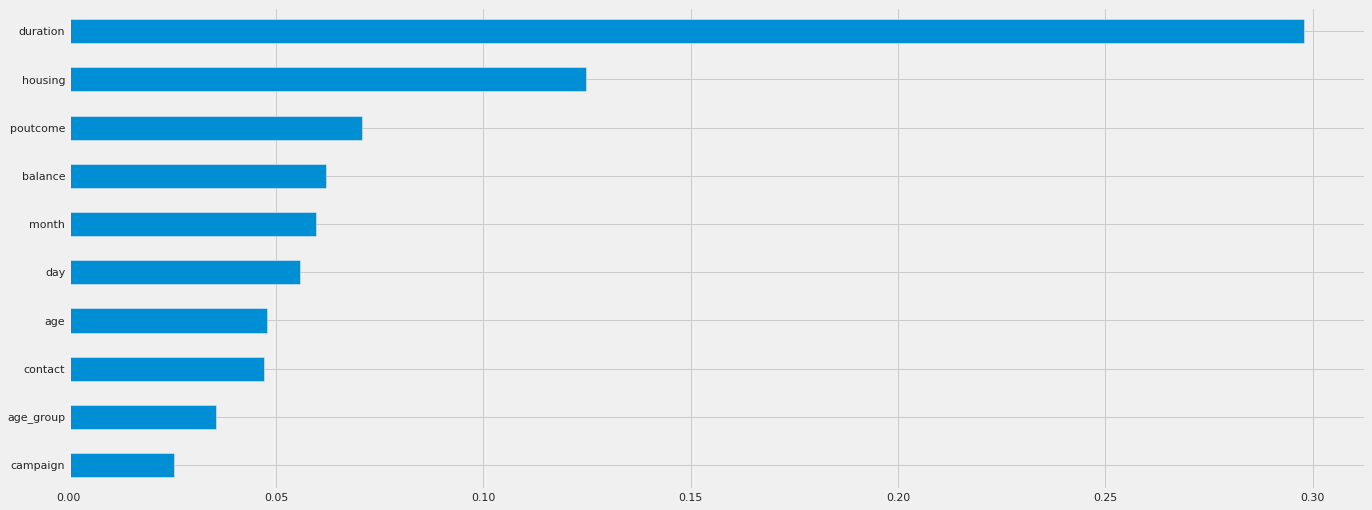

In [93]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
eval_classification(model, y_pred, x_train, y_train, x_test, y_test)
print(model.feature_importances_)

feat_importances = pd.Series(model.feature_importances_, index=x.columns)
# feat_importances = feat_importances.sort_values(ascending=True)
ax = feat_importances.nlargest(10).plot(kind='barh')
ax.invert_yaxis()

# ax.figure(figsize=())

## Logistic Regression

In [94]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
eval_classification(model, y_pred, x_train, y_train, x_test, y_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


Accuracy (Test Set): 0.75
Precision (Test Set): 0.66
Recall (Test Set): 0.50
F1-Score (Test Set): 0.57
AUC: 0.69


## EXTRA TREE CLASSIFIER

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=42, verbose=0,
                     warm_start=False)


Accuracy (Test Set): 0.92
Precision (Test Set): 0.90
Recall (Test Set): 0.87
F1-Score (Test Set): 0.88
AUC: 0.91
[0.049039   0.04041041 0.03184271 0.02606144 0.02520761 0.02770117
 0.03436981 0.04039827 0.03470464 0.00197117 0.04794808 0.09316797
 0.02950094 0.06468256 0.0503011  0.05730603 0.19896589 0.04077784
 0.02847594 0.01644164 0.0607258 ]


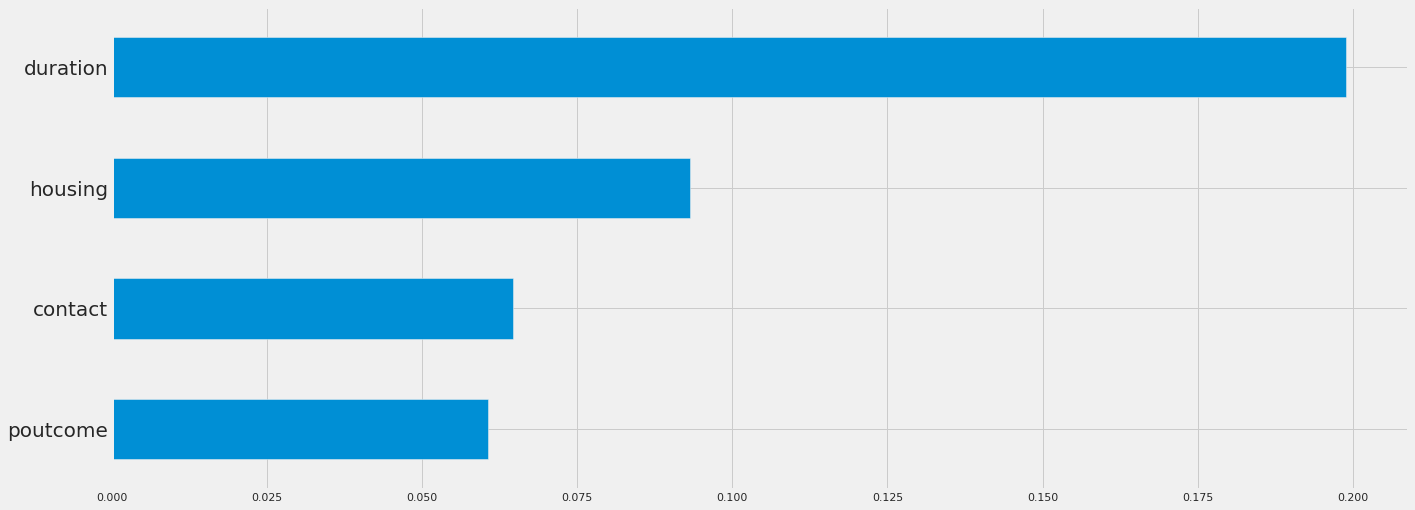

In [95]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier(random_state=42)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
eval_classification(model, y_pred, x_train, y_train, x_test, y_test)
print(model.feature_importances_)

feat_importances = pd.Series(model.feature_importances_, index=x.columns)
# plt.figure(figsize=(12, 12))
plt.rcParams['ytick.labelsize'] = '20'
ax = feat_importances.nlargest(4).plot(kind='barh')
ax.invert_yaxis()
plt.show()


In [96]:

ypred1 = model.predict(x)
np.unique(ypred1, return_counts=True)

(array([0, 1]), array([38140,  4567]))

## KNN

In [97]:
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
eval_classification(model, y_pred, x_train, y_train, x_test, y_test)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


Accuracy (Test Set): 0.84
Precision (Test Set): 0.72
Recall (Test Set): 0.81
F1-Score (Test Set): 0.77
AUC: 0.83


In [98]:
model = DecisionTreeClassifier(random_state=42)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
eval_classification(model, y_pred, x_train, y_train, x_test, y_test)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')


Accuracy (Test Set): 0.88
Precision (Test Set): 0.81
Recall (Test Set): 0.83
F1-Score (Test Set): 0.82
AUC: 0.87


##XG BOOST

In [99]:
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42)
xg.fit(x_train, y_train)

y_pred = xg.predict(x_test)
eval_classification(xg, y_pred, x_train, y_train, x_test, y_test)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


Accuracy (Test Set): 0.90
Precision (Test Set): 0.85
Recall (Test Set): 0.83
F1-Score (Test Set): 0.84
AUC: 0.88


#### Hyperparameter Tuning Extra Tree (Ilham)

In [100]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
max_features = ['auto', 'sqrt']

hyperparameters = dict(max_features=max_features)

# Inisialisasi Model
model = ExtraTreesClassifier(random_state=42)
model = RandomizedSearchCV(model, hyperparameters, cv=5, random_state=42, scoring='f1')
model.fit(x_train, y_train)
# Predict & Evaluation
y_pred = model.predict(x_test)
eval_classification(model, y_pred, x_train, y_train, x_test, y_test)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=ExtraTreesClassifier(bootstrap=False,
                                                  ccp_alpha=0.0,
                                                  class_weight=None,
                                                  criterion='gini',
                                                  max_depth=None,
                                                  max_features='auto',
                                                  max_leaf_nodes=None,
                                                  max_samples=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                        


Accuracy (Test Set): 0.92
Precision (Test Set): 0.90
Recall (Test Set): 0.87
F1-Score (Test Set): 0.88
AUC: 0.91


In [101]:
# Predict & Evaluation
y_pred = model.predict(x_test)
eval_classification(model, y_pred, x_train, y_train, x_test, y_test)
print('Best max_depth:', model.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split:', model.best_estimator_.get_params()['min_samples_split'])
print('Best min_samples_leaf:', model.best_estimator_.get_params()['min_samples_leaf'])
print('Best max_features:', model.best_estimator_.get_params()['max_features'])


Accuracy (Test Set): 0.92
Precision (Test Set): 0.90
Recall (Test Set): 0.87
F1-Score (Test Set): 0.88
AUC: 0.91
Best max_depth: None
Best min_samples_split: 2
Best min_samples_leaf: 1
Best max_features: auto
